# Cellular Automata

https://mathworld.wolfram.com/ElementaryCellularAutomaton.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_table(rule):
    """Make the table for a given CA rule.
    
    rule: int 0-255
    
    returns: array of 8 0s and 1s
    """
    rule = np.array([rule], dtype=np.uint8)
    table = np.unpackbits(rule)[::-1]
    return table

# Cell1D object - a 1-D cellular automaton

class Cell1D:
    # Initialize the CA
    # rule: int, n: number of rows, m: number of columns
    
    # Attributes:
    # table:  rule dictionary that maps from triple to next state
    # array:  the numpy array that contains the data
    # next:   the index of the next empty row
    
    def __init__(self, rule, n, m=None):
        self.table = make_table(rule)
        self.n = n
        self.m = 2*n + 1 if m is None else m

        self.array = np.zeros((n, self.m), dtype=np.int8)
        self.next = 0

    # start with - 

    # one cell in the middle of the top row
    def start_single(self):
        self.array[0, self.m//2] = 1
        self.next += 1

    # random values in the top row
    def start_random(self):
        self.array[0] = np.random.random(self.m).round()
        self.next += 1

    # values from a string of 1s and 0s
    # TODO: Check string length
    def start_string(self, s):
        self.array[0] = np.array([int(x) for x in s])
        self.next += 1


    # execute the given number of time steps (iterations)
    def loop(self, steps=1):
        for i in range(steps):
            self.step()

    # execute one time step by computing the next row of the array
    def step(self):
        a = self.array
        i = self.next
        window = [4, 2, 1]
        c = np.correlate(a[i-1], window, mode='same')
        a[i] = self.table[c]
        self.next += 1

    # draw the CA using pyplot.imshow
    # start: index of the first column to be shown
    # end: index of the last column to be shown
    def draw(self, start=0, end=None):
        a = self.array[:, start:end]
        plt.figure(figsize=(16,16))
        plt.imshow(a, cmap='Blues', alpha=0.7)
        # turn off axis tick marks
        plt.xticks([])
        plt.yticks([])


# make and draw a CA

# draw a 1D CA with a given rule    
# rule: int rule number
# n: number of rows
def draw_ca(rule, n=32):
    ca = Cell1D(rule, n)
    # ca.start_single()
    ca.start_random()
    ca.loop(n-1)
    ca.draw()

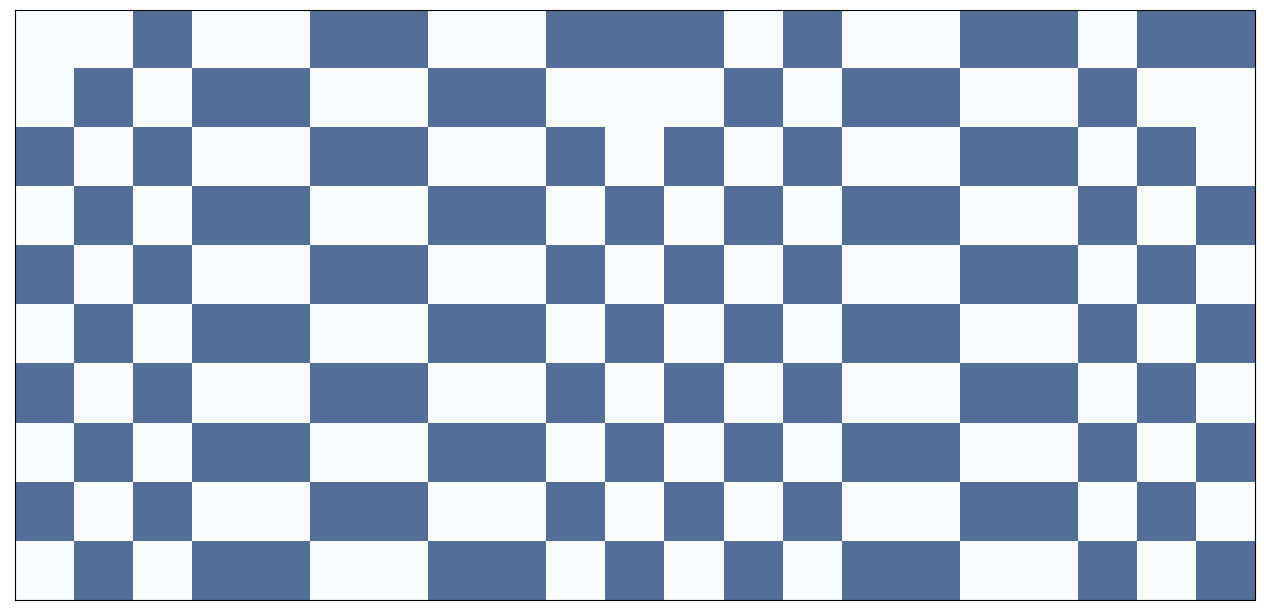

In [2]:
# run a Rule 50 CA for 10 steps
draw_ca(rule=50, n=10)

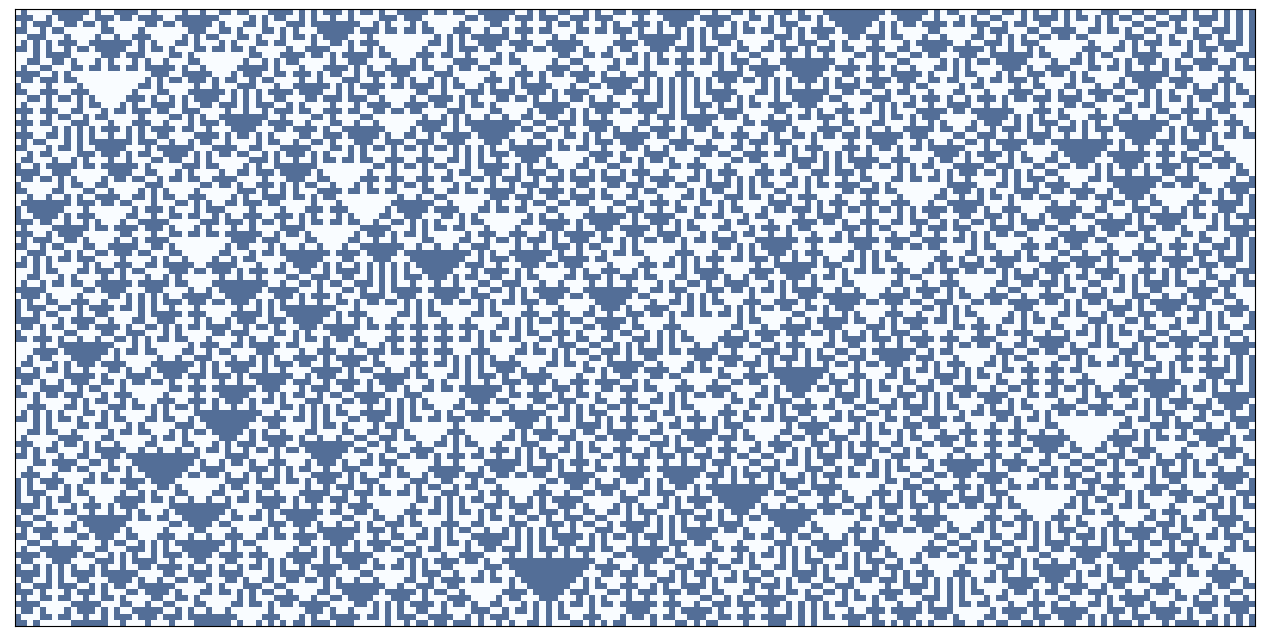

In [3]:
draw_ca(rule=150, n=100)

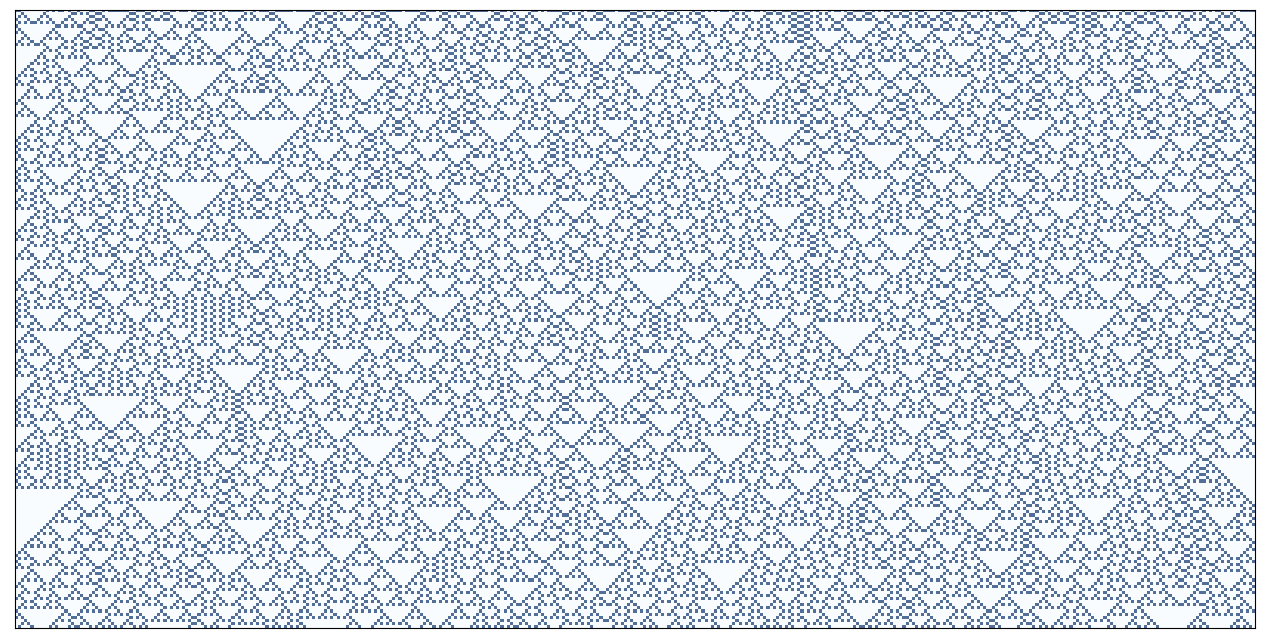

In [4]:
rule = 18
iterations = 200
# recursive structure
draw_ca(rule, iterations)

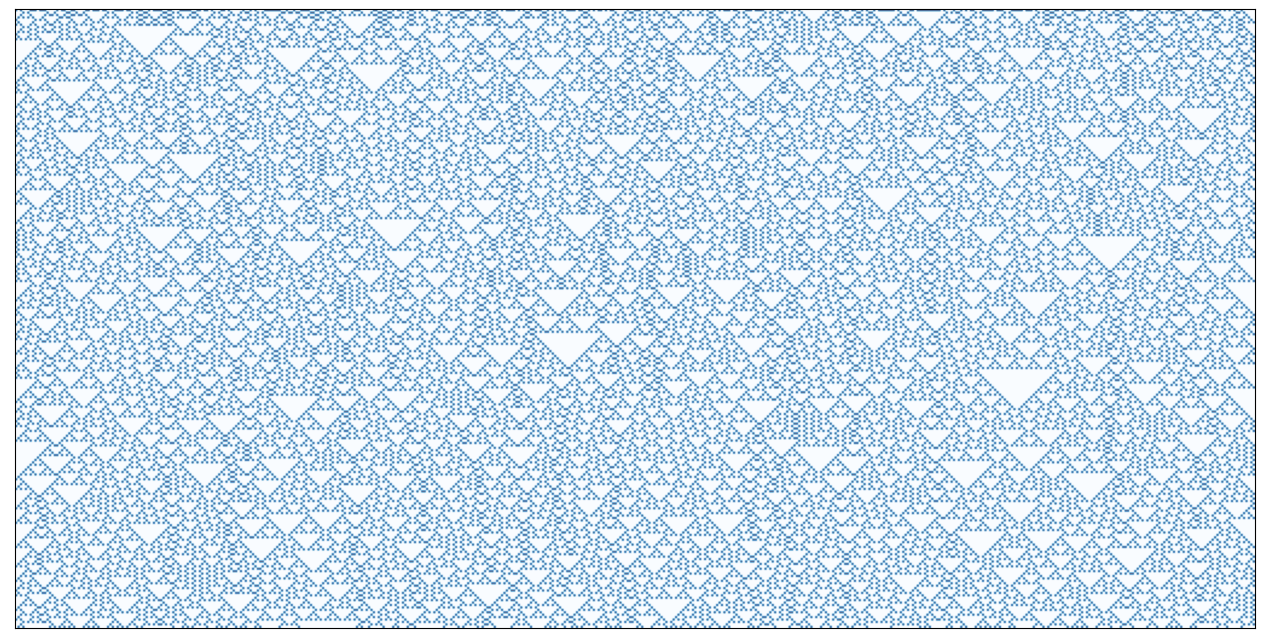

In [5]:
rule = 18
iterations = 256
# recursive structure
draw_ca(rule, iterations)

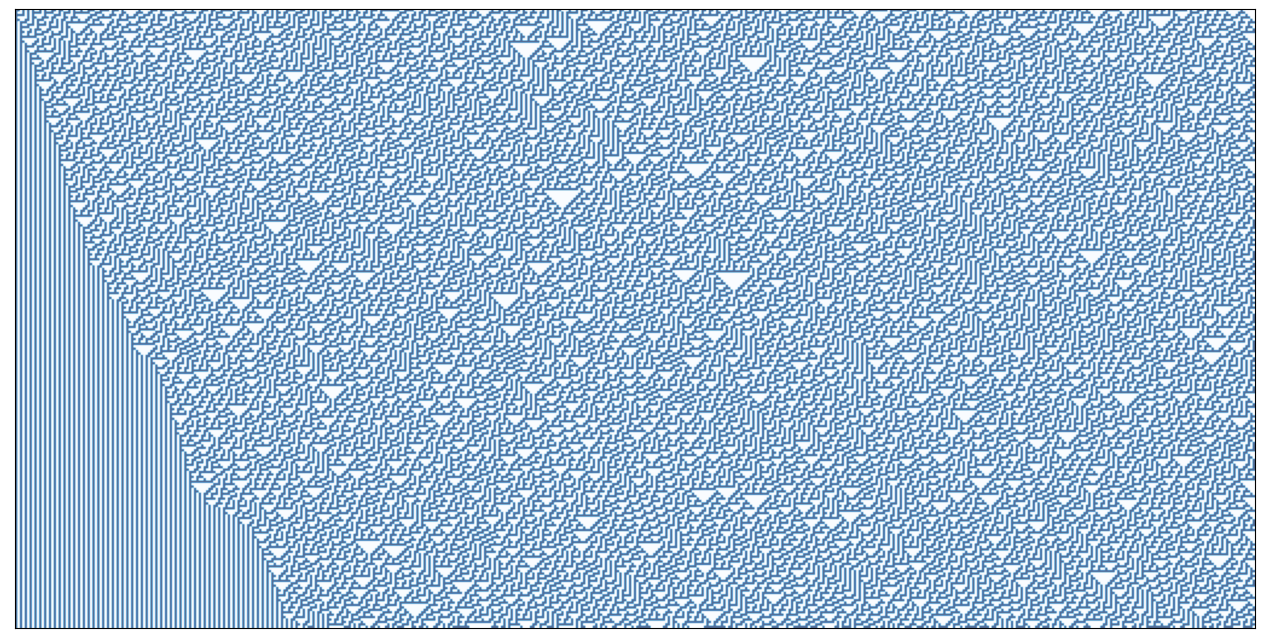

In [6]:
# Rule 30 generates a sequence of bits that is indistinguishable from random:
rule = 30
iterations = 256
draw_ca(rule, iterations)

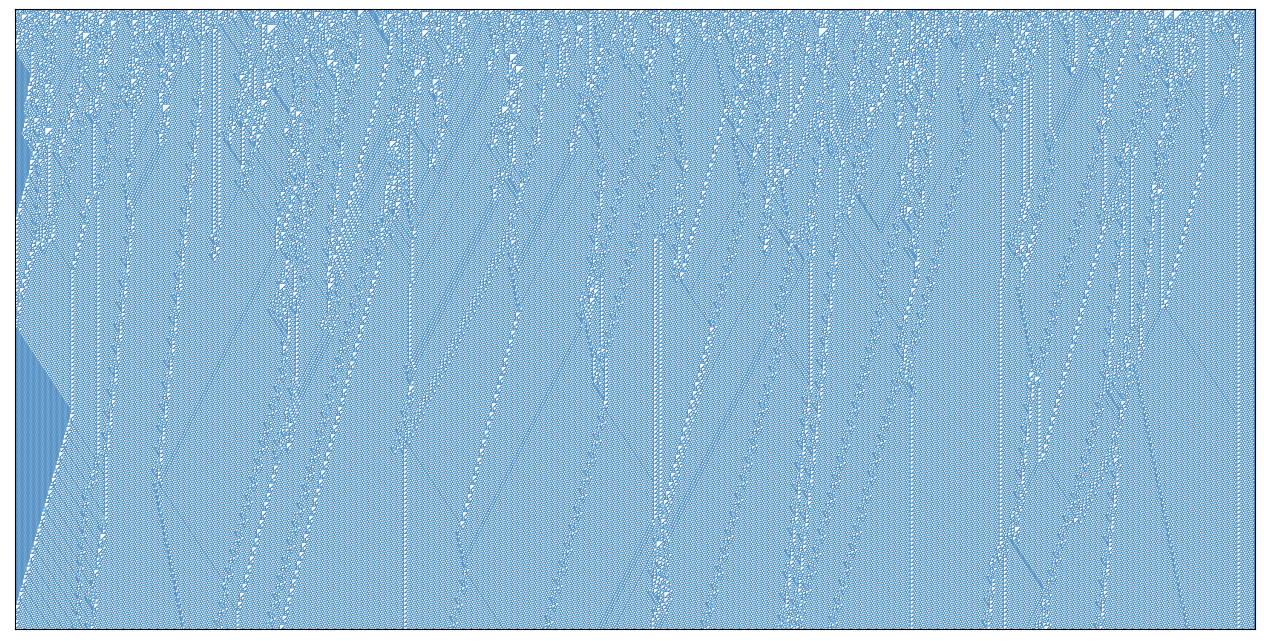

In [7]:
draw_ca(rule=110, n=1024)